# Berechnen der Versicherungsprämie für ein Lebensversicherungsprodukt

In dieser Fallstudie vergleichen wir eine Lösung, die in Excel erstellt wurde, mit einer Lösung in Python. 
Die Lösung in Excel finden Sie [hier](https://drive.switch.ch/index.php/s/I9hNB8SRcAzuWjq).

Wir wollen vergleichen, wie sich die gleiche Berechnung in Excel und in Python verhält und was die Vor- und Nachteile des jeweiligen Produkts sind. 

## Simulation in Python


Als Grundlage für unsere Simulation nutzen wir die Sterbestatistik. 
Der $i$-te Eintrag `sterbe_wahrscheinlichkeit` gibt uns das Sterberisiko im $i$-ten Lebensjahr. 

In [1]:
sterbe_wahrscheinlichkeit = [0.0045, 0.0004, 0.0002, 0.0001, 0.0001, 
                        0.0001, 0.0001, 0.0000, 0.0001, 0.0001, 
                        0.0001, 0.0001, 0.0000, 0.0000, 0.0001, 
                        0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 
                        0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 
                        0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
                        0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 
                        0.0002, 0.0002, 0.0002, 0.0003, 0.0003, 
                        0.0003, 0.0003, 0.0003, 0.0004, 0.0004, 
                        0.0004, 0.0005, 0.0005, 0.0006, 0.0006, 
                        0.0006, 0.0007, 0.0008, 0.0009, 0.0009, 
                        0.0010, 0.0011, 0.0012, 0.0013, 0.0014, 
                        0.0015, 0.0017, 0.0018, 0.0020, 0.0022, 
                        0.0024, 0.0026, 0.0029, 0.0032, 0.0035, 
                        0.0038, 0.0042, 0.0047, 0.0053, 0.0059, 
                        0.0068, 0.0077, 0.0088, 0.0101, 0.0116, 
                        0.0136, 0.0158, 0.0186, 0.0218, 0.0255, 
                        0.0294, 0.0343, 0.0395, 0.0458, 0.0527, 
                        0.0604, 0.0682, 0.0770, 0.0864, 0.0967, 
                        0.1079, 0.1199, 0.1331, 0.1473, 0.1622]

max_alter = len(sterbe_wahrscheinlichkeit) 

Um schnell einen Überblick zu bekommen, wie sich diese Wahrscheinlichkeit verhält, plotten wir diese. 

In [2]:
from matplotlib.pyplot import *

Text(0, 0.5, 'p')

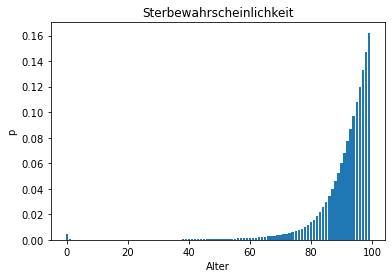

In [3]:
bar(range(0, len(sterbe_wahrscheinlichkeit)), sterbe_wahrscheinlichkeit)
title('Sterbewahrscheinlichkeit')
xlabel('Alter')
ylabel('p')

Angenommen eine Person möchte in einem bestimmten Alter eine Lebensversicherung abschliessen. Unsere erste Frage wäre, was die Wahrscheinlichkeit ist, dass die Person ein bestimmtes Alter erlebt. 

Dies können wir elegant über Rekursion ausdrücken. Die Wahrscheinlichkeit $n$ Jahre alt zu werden entspricht der Wahrscheinlichkeit $n-1$ Jahre alt zu werden, mal der Wahrscheilichkeit im $n-1$-ten Lebensjahr nicht zu sterben. 

In [11]:
# Berechnet die Überlebenswahrscheinlichkeit, dass die Person alter Jahre alt wird, 
# unter der Annahme, dass sie bei alter_zu_beginn noch am leben war. 
def berechne_ueberlebenswahrscheinlichkeit(alter, alter_zu_beginn):   
    if alter <= alter_zu_beginn:
        return 1
    elif alter >= max_alter:
        return 0
    else:
        # Wahrscheinlichkeit entspricht der Wahrscheinlichkeit das Vorjahr zu überleben mal der Wahrscheinlichkeit
        # bis zum Vorjahr überhaupt überlebt zu haben. 
        return (1 - sterbe_wahrscheinlichkeit[alter - 1]) * berechne_ueberlebenswahrscheinlichkeit(alter - 1, alter_zu_beginn)

Nun können wir einfach die Wahrscheinlichkeit berechnen, dass wir, wenn wir ein bestimmtes Alter erreichen, auch ein späteres Alter erreichen. Was ist zum Beispiel die Wahrscheinlichkeit, dass wenn wir 80 werden auch 90 Jahre alt werden? 

In [5]:
berechne_ueberlebenswahrscheinlichkeit(90, 80)

0.7390925369582143

Umgekehrt ist es mit dieser Information natürlich einfach zu berechnen, was die Wahrscheinlichkeit ist in einem bestimmten Lebensjahr abzuleben, gegeben dass wir wissen, ein bestimmtes Alter erreicht zu haben. 

In [12]:
def berechne_absterbeordnung(alter, alter_zu_beginn):
    p1 = berechne_ueberlebenswahrscheinlichkeit(alter, alter_zu_beginn)
    p2 = berechne_ueberlebenswahrscheinlichkeit(alter -1, alter_zu_beginn)
    return p2 - p1

Wenn jemand nicht stirbt, kann die Versicherung das Geld anlegen und bekommt jedes Jahr einen Zins. Dies kann von den Prämien abegzogen werden. 

In [13]:
def diskontiere_leistung(leistungen, alter, alter_zu_beginn, zins):
    return leistungen / (1 + zins) ** (alter - alter_zu_beginn)

Nun haben wir die Wahrscheinlichkeit für jedes Jahr, dass die Versicherung die Lebensversicherungsprämie auszahlen muss. 
Damit können wir die erwarteten Kosten und entsprechend die Versicherungsprämie ausrechnen. 

In [14]:
# 
# Berechnet die erwarteten Kosten für eine Versicherung, wenn diese 
# in einem gewissen Alter abgeschlossen wird

def berechne_barwert(alter_zu_beginn, versicherungssumme, zins):
    summe_leistungen = 0
    
    for alter in range(alter_zu_beginn, max_alter + 1):
        
        gewichtete_leistungen = versicherungssumme * berechne_absterbeordnung(alter, alter_zu_beginn)        
        
        # Die Kosten werden mit dem Zinseszins diskontiert, den wir bis zu diesem Alter erhalten. 
        diskontierte_leistungen =  diskontiere_leistung(gewichtete_leistungen, alter, alter_zu_beginn, zins) 
    
        summe_leistungen = summe_leistungen + diskontierte_leistungen;
    return summe_leistungen


In [15]:
berechne_barwert(alter_zu_beginn = 30, versicherungssumme = 1000000, zins = 0.03)

169376.65622583614

#### Visualisierung

Nun wollen wir die Daten noch visualisieren.

Wir visualisieren, wie die Prämie steigt, wenn wir die Versicherung später abschliessen. 

Text(0, 0.5, 'Erwartete Kosten')

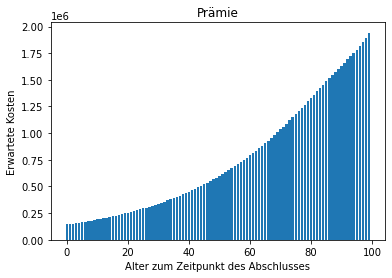

In [16]:
praemie = []
for alter_zu_beginn in range(0, max_alter):
    praemie.append(berechne_barwert(alter_zu_beginn, 2000000, 0.03))

bar(range(0, len(praemie)), praemie)
title('Prämie')       
xlabel('Alter zum Zeitpunkt des Abschlusses')
ylabel('Erwartete Kosten')
